<a href="https://www.kaggle.com/code/emreustundag/fruits360-cnn-vgg16?scriptVersionId=111178055" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Image Classification with Convolutional Neural Network (CNN) on Fruits-360 Dataset

Outline of the project:

* [Introduction](#1)
* [Packages & Libraries](#2)
* [Looking at Data](#3)
* [CNN Model](#4)
* [Data Generation and Model Fit](#5)
* [Save and Load Model](#6)
* [Evaluation of CNN Model](#7)
* [Transfer Learning](#8)
    * [VGG16](#9)
    * [Evaluate VGG16](#10)

<a id = "1"></a>
### Introduction
<img src="https://www.researchgate.net/publication/358255344/figure/fig4/AS:1118672802320404@1643723788128/Sample-of-the-Fruit-360-dataset.jpg">

Source: [https://www.researchgate.net/figure/Sample-of-the-Fruit-360-dataset_fig4_358255344]

Image Classification is a fundamental task that attempts to comprehend an entire image as a whole. The goal is to classify the image by assigning it to a specific label. Typically, Image Classification refers to images in which only one object appears and is analyzed. In contrast, object detection involves both classification and localization tasks, and is used to analyze more realistic cases in which multiple objects may exist in an image.


<a id = "2"></a>
### Packages & Libraries

In [28]:
import matplotlib.pyplot as plt
from glob import glob

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

<a id = "3"></a>
### Exploring Data

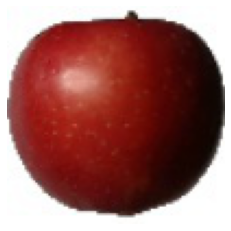

In [29]:
train_path = "../input/fruits/fruits-360_dataset/fruits-360/Training/"
test_path = "../input/fruits/fruits-360_dataset/fruits-360/Test/"

# a sample apple braeburn image
img = load_img(train_path + "Apple Braeburn/100_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [30]:
# image matrix shape with rgb
x = img_to_array(img)
x.shape

(100, 100, 3)

In [31]:
# how many classes are there in dataset?
classNames = glob(train_path + "/*")
numberOfClass = len(classNames)
print("The number of class:", numberOfClass)

The number of class: 131


<a id = "4"></a>
### CNN Model

In [32]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output layer
model.add(Activation("softmax"))

In [33]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [34]:
batch_size = 32

<a id = "5"></a>
### Data Generation and Model Fit

In [35]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [36]:
history = model.fit_generator(generator = train_generator, 
                    steps_per_epoch = 1600 // batch_size, 
                    epochs = 50, 
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

Epoch 1/50
50/50 [==============================] - 12s 230ms/step - loss: 4.7019 - accuracy: 0.0388 - val_loss: 4.1374 - val_accuracy: 0.0838
Epoch 2/50
50/50 [==============================] - 12s 233ms/step - loss: 3.8188 - accuracy: 0.1081 - val_loss: 3.1112 - val_accuracy: 0.1850
Epoch 3/50
50/50 [==============================] - 11s 220ms/step - loss: 3.0920 - accuracy: 0.1863 - val_loss: 2.3721 - val_accuracy: 0.3500
Epoch 4/50
50/50 [==============================] - 11s 219ms/step - loss: 2.5686 - accuracy: 0.2756 - val_loss: 1.7990 - val_accuracy: 0.5238
Epoch 5/50
50/50 [==============================] - 11s 224ms/step - loss: 2.0846 - accuracy: 0.3919 - val_loss: 1.4827 - val_accuracy: 0.6075
Epoch 6/50
50/50 [==============================] - 11s 214ms/step - loss: 1.8524 - accuracy: 0.4506 - val_loss: 1.0579 - val_accuracy: 0.6913
Epoch 7/50
50/50 [==============================] - 11s 224ms/step - loss: 1.5260 - accuracy: 0.5331 - val_loss: 1.0362 - val_accuracy: 0.6862

<a id = "6"></a>
### Save Model

In [37]:
def save_model(fileName):
    model.save_weights(fileName + ".h5")
    
    import json
    with open(fileName + ".json","w") as f:
        json.dump(history.history, f)

def load_json(fileName):
    import codecs
    import json
    with codecs.open(fileName + ".json", "r", encoding = "utf-8") as f:
        h = json.loads(f.read())
        
    return h
        
# save_model("test")
# h = load_json("test")

<a id = "7"></a>
### Evaluation of CNN Model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


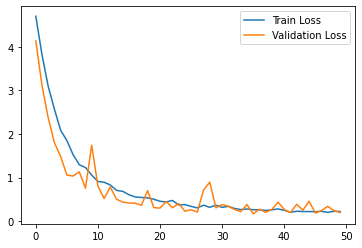

In [38]:
print(history.history.keys())
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

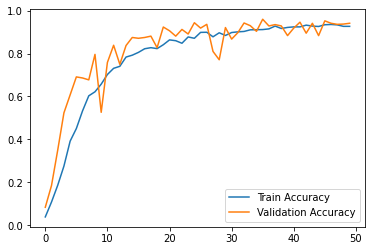

In [39]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

<a id = "8"></a>
### Transfer Learning

<img src="https://ruder.io/content/images/2017/03/transfer_learning_setup.png" height = "500" width = "700">

Source: [https://ruder.io/transfer-learning/index.html#whatistransferlearning]

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

<a id = "9"></a>
#### VGG16

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" height = "500" width = "800">

In [49]:
# import vgg16 model from keras library
from keras.applications.vgg16 import VGG16

vgg = VGG16()

In [50]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [51]:
# all layers of vgg16
vgg_layer_list = vgg.layers
vgg_layer_list

In [52]:
# drop last dense layer that has 1000 class-prediction layers
model = Sequential()
for i in range(len(vgg_layer_list)-3):
    model.add(vgg_layer_list[i])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [53]:
# freeze layers
for layers in model.layers:
    layers.trainable = False

model.add(Dense(4096, activation = "relu"))
model.add(Dense(4096, activation = "relu"))
    
# adding last layer as a trainable layer
model.add(Dense(numberOfClass, activation = "softmax"))
# last model's summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [54]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [55]:
# re-generate images with (224, 224) target size
train_generator = train_datagen.flow_from_directory(train_path, target_size = (224, 224), batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size = (224, 224), batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

history = model.fit_generator(generator = train_generator, 
                    steps_per_epoch = 1600 // batch_size, 
                    epochs = 30, 
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
50/50 [==============================] - 23s 443ms/step - loss: 16.0004 - accuracy: 0.0312 - val_loss: 4.6896 - val_accuracy: 0.0575
Epoch 2/30
50/50 [==============================] - 24s 472ms/step - loss: 4.3193 - accuracy: 0.0706 - val_loss: 3.7003 - val_accuracy: 0.1525
Epoch 3/30
50/50 [==============================] - 22s 448ms/step - loss: 3.6240 - accuracy: 0.1631 - val_loss: 3.0938 - val_accuracy: 0.2350
Epoch 4/30
50/50 [==============================] - 23s 446ms/step - loss: 2.8275 - accuracy: 0.2719 - val_loss: 2.4186 - val_accuracy: 0.3288
Epoch 5/30
50/50 [==============================] - 22s 436ms/step - loss: 2.3562 - accuracy: 0.3663 - val_loss: 2.3226 - val_accuracy: 0.3688
Epoch 6/30
50/50 [==============================] - 23s 451ms/step - loss: 1.8882 - accuracy: 0.4794 - val_loss: 2.1914 - val_accuracy: 0.4225
Epoch 7/30
50/50 [==============================] - 22s 444ms/step - loss: 1.6674 - accuracy: 0.5319 - val_loss: 2.6945 - val_accuracy: 0.417

<a id = "10"></a>
#### Evaluate VGG16

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


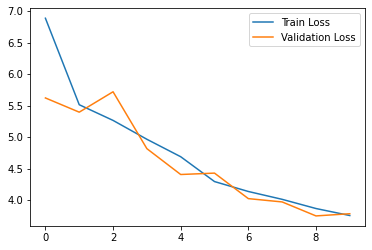

In [47]:
print(history.history.keys())
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

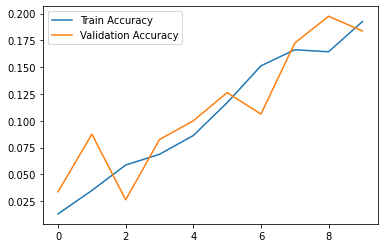

In [48]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

**Thanks for looking at the kernel. Please upvote the work if you like...**